# Implementation of a Multi-Layer Perceptron
In this Notebook you will find a simple implementation of a Multi-layer Perceptron that can perform standard logical operations (and, or, nand, nor, xor).

In [ ]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt

## Data Set
We create a data set for each operator. x is an array of all possible inputs. For operator we define another array with the target outputs in the correct order to nicely map on x.

In [ ]:
# data structure
x = np.array([[0,0],[1,0],[0,1],[1,1]])

# targets
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_xor = np.array([0,1,1,0])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])

## Perceptron
The Perceptron is the basic unit of an MLP. It can take in a number of inputs, multiply them with weights, add them together and produce an output according to the activation function (in this case the sigmoid function). The perceptron will also pdate itself when an errorsignal is given and thus, adjust it's weights and the bias.

In [ ]:
class Perceptron: 
  def __init__(self, input_units):
    #number of inputs
    self.input_units = input_units
    # stores the last given input
    self.input = []
    #init random weights + bias for starters
    self.weights = np.random.randn(input_units)
    #print(self.weights)
    self.bias = np.random.randn()
    #define learning rate as 1
    self.alpha = 1
    self.w_sum = 0
    

  def forward(self, input):
    self.input = input

    #calculate weighted sum 
    self.w_sum = input @ self.weights + self.bias

    #return activated sum
    return expit(self.w_sum)

  def update(self, delta):  
    #update weights and bias
    n_weights = self.weights - self.alpha * delta * np.array(self.input)
    n_bias = self.bias - self.alpha * delta * np.array(self.input)

    self.weights = n_weights
    self.n_bias = n_bias




    

## The Multi-Layer Perceptron

This MLP consits of the inputlayer one hidden layer with 4 Perceptrons and one outputlayer with only one Perceptron. The input layer receives a two dimensional vector and distributes this input to the hiddenlayer.

In the training process, the MLP will compare it's generated output to the target output and will start the back-propagation process.

In [ ]:
class MLP: 
  def __init__(self, hl_size, input_units):
    self.input_units = input_units
    self.h_layer = [Perceptron(input_units) for p in range(0, hl_size)]
    self.output = Perceptron(hl_size)
    
  def forward_step(self, input):
    res = []
    for p in self.h_layer:
      res.append(p.forward(input))
    pred = self.output.forward(res)
    return pred
    
  
  def backprop_step(self, pred, target):
    deri = expit(self.output.w_sum)*(1-expit(self.output.w_sum))
    

    delta = (pred - target) * deri
    deltas = []

    for i, p in enumerate(self.h_layer): 
      deltas.append(delta * self.output.weights[i] * (expit(p.w_sum)*(1-expit(p.w_sum))))
    
    self.output.update(delta)
    
    for i, p in enumerate(self.h_layer): 
      p.update(deltas[i])

  
   

## The Actual Training Process

Here, we instatiate the MLP and define the number of epochs. Each epoch uses each point in the data set once. For each epoch the loss (squared difference between taget and output) is calculated and also the average accuracy.

In [ ]:
mlp = MLP(4,2)
epochs = 1000
eval = []

#take random int (1-4) choose input from it and then compare to 
#target at same position

for i in range(epochs): 
  indeces = [0,1,2,3]
  np.random.shuffle(indeces)
  accuracy = 0
  loss = 0
  for input in indeces:
    target = t_xor[input]
    pred = mlp.forward_step(x[input])
    mlp.backprop_step(pred, target)
    loss += (target - pred)**2
    accuracy += int(int(pred>0.5) == target)
  eval.append((loss/4,accuracy/4))


print(mlp.forward_step([1,1]))
print(mlp.forward_step([0,1]))
print(mlp.forward_step([1,0]))
print(mlp.forward_step([0,0]))





0.07253819283194911
0.9016126019948231
0.8975246314815458
0.13057560272868882


## Showing the Results

In the graph below, the development over epochs of loss (blue) and accuracy (orange) are depicted.


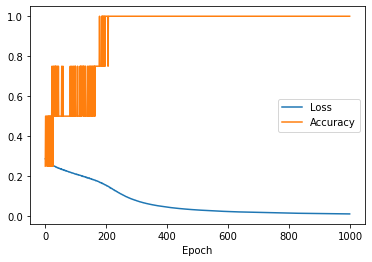

In [ ]:
plt.plot(np.array(eval)[:,0])
plt.plot(np.array(eval)[:,1])
plt.xlabel("Epoch")
plt.legend(["Loss", "Accuracy"])
plt.show()